# Research of sales advertising in the housing market 

The data is provided by Yandex.Realty, the real estate agency. The dataset is an archive of sales advertising in the housing market in St. Petersburg (Russia) and the surrounding areas collected over the past few years. The goal is to research how to determine the market value of the real estate (set parameters that will help to determine it). This will allow to build an automated system that will track anomalies and fraudulent activity.

There are two types of data available for each apartment set for sale. The first type is entered by the user, the second type is received automatically based upon the map data. For example, the distance from the downtown area, airport, the nearest park or body of water.

# Data Description

**Note:** the data provided by the Yandex.Realty is about the housing market in Russia, thus some contents of the dataset might be in Russian language.

airports_nearest — distance to the nearest airport in meters (m)<br>
balcony - number of balconies<br>
ceiling_height – ceiling height (m)<br>
cityCenters_nearest — distance to the city center (m)<br>
days_exposition — how many days the ad was placed (from publication to removal)<br>
first_day_exposition - date of publication<br>
floor - which floor<br>
floors_total - total floors in the house<br>
is_apartment - apartments (boolean type)<br>
kitchen_area - kitchen area in square meters (m²)<br>
last_price - price at the time of removal from publication<br>
living_area - living area in square meters (m²)<br>
locality_name - name of the locality<br>
open_plan - free layout (boolean type)<br>
parks_around3000 — number of parks within a radius of 3 km<br>
parks_nearest — distance to the nearest park (m)<br>
ponds_around3000 — the number of ponds within a radius of 3 km<br>
ponds_nearest — distance to the nearest body of water (m)<br>
rooms - number of rooms<br>
studio - studio apartment (boolean type)<br>
total_area — area of ​​the apartment in square meters (m²)<br>
total_images — the number of photos of the apartment in the ad<br>

## Step 1. Data quality assessment

In [748]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from pymystem3 import Mystem # for stemming/lemmatization of Russian words

m = Mystem()

In [749]:
# opening the data file
df = pd.read_csv('real_estate_data.csv', sep='\t', decimal='.')

In [750]:
# getting the first 5 table strings.
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [751]:
# looking at the general information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [752]:
# checking for at the NaN values
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [753]:
# finding the list of columns with NaN
df.columns[df.isna().any()].tolist()

['ceiling_height',
 'floors_total',
 'living_area',
 'is_apartment',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest',
 'cityCenters_nearest',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest',
 'days_exposition']

In [754]:
# checking for duplicates
df.duplicated().sum()

0

In [755]:
# checking numeric values
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


The available data types include bool(2), float64(14), int64(3), object(3), we can check more information about object and bool dtypes

In [756]:
# checking quantitative values of object & bool data type
df.describe(include=['object','bool'])

,first_day_exposition,is_apartment,studio,open_plan,locality_name
count,23699,2775,23699,23699,23650
unique,1491,2,2,2,364
top,2018-02-01T00:00:00,False,False,False,Санкт-Петербург
freq,368,2725,23550,23632,15721


**Summary:** We have a table with the total of 23699 rows and 22 columns of data. Data types include float64, int64, bool and object. Findings:

1. Missing values in columns: ['ceiling_height',
 'floors_total',
 'living_area',
 'is_apartment',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest',
 'cityCenters_nearest',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest',
 'days_exposition']
 2. Wrong data type in the following columns (and what it must be changed to): 
<br>first_day_exposition - change to datetime.
<br>floors_total - change to int.
<br>is_apartment - change to bool.
<br>balcony - change to int.
<br>parks_around3000 - change to int.
<br>ponds_around3000 - change to int.
<br>days_exposition - change to int.
3. Uneven letter case in 'locality_name'
4. Rooms have minimum value of 0 (should be 1)
5. Ceiling height has a minimum of 1m and max of 100 (check for data outliers)

## Step 2. Data preprocessing

### Processing the missing values

**- Processing 'balcony', 'parks_around3000', 'ponds_around3000', 'parks_nearest','ponds_nearest' columns**

There are missing values in the columns ('balcony', 'parks_around3000', 'ponds_around3000', 'parks_nearest','ponds_nearest'). Since we have no way of checking the reason behind the missing values in these column, we can hypothesize that the missing values here represent 0, e.g. NaN in 'balcony' means that there are 0 balconies in the apartment.

In [757]:
# Filling the missing values with 0
df[['balcony', 'parks_around3000', 
    'ponds_around3000', 'parks_nearest','ponds_nearest']] = df[['balcony','parks_around3000',
                                                                'ponds_around3000','parks_nearest','ponds_nearest']].fillna(0)

**- Processing 'ceiling_height', 'floors_total', 'airports_nearest', 'cityCenters_nearest' columns**

Do the similar action for 'ceiling_height',
    'floors_total',
    'airports_nearest',
    'cityCenters_nearest' but fill the missing values with *median* in each column. We replace them with median value because the median is resistant to the outliers in the data.

In [758]:
fill_with_median = ['ceiling_height',
    'floors_total',
    'airports_nearest',
    'cityCenters_nearest']
for i in fill_with_median:
    df[i] = df[i].fillna(df[i].median())

**- Processing 'ceiling_height' column**

In [759]:
df['ceiling_height'].describe()

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

We can see that there are 25% or the data that represent the rooms with the ceiling height of above 2.7 meters and that the height might go up to 100 meters, which seems unrealistic.
Let's check how many apartments have a ceiling height beyond 10 meters:

In [760]:
# count the number of height above 10 m
df.query('ceiling_height >= 10')['ceiling_height'].count()

25

So we have a total of 25 apartments with the ceiling height more than 10 m. We replace them with median value because the median is resistant to the data outliers.

In [761]:
# count mean for "ceiling_height" column
median_height = df['ceiling_height'].median() 

# replace values > 10 with "median_height"
df.loc[df['ceiling_height'] >= 10, 'ceiling_height'] = median_height

**- Processing 'days_exposition' column**

Fill rhe column 'days_exposition' with the max values (number of days) in this column, hypothesizing that the missing values here represent that the apartment hasn't been sold yet and is still being advertised: 

In [762]:
max_days_exp = df['days_exposition'].max()
print('Max number of days displayed:', max_days_exp)
print('Max number of days converted to years',round(max_days_exp/365)) #number of years of the apartment being sold on real estate agency (up to current date)

# filling in the missing values
df['days_exposition'] = df['days_exposition'].fillna(max_days_exp)

Max number of days displayed: 1580.0
Max number of days converted to years 4


**- Processing 'rooms' column**

In the Step 1 we found that the 'rooms' column had an abnormality of having 0 rooms. We can hypothesize that the 0 might represent the values such as 'studio' apartment or 'open_plan':

In [763]:
# checking the values
df['rooms'].value_counts() 

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64

We have 197 "rooms" = 0. Check how many of these represent 'studio' or 'open_plan' apartment type:

In [764]:
# using .query() to obtain the necessary information
df.query('rooms == 0 and (studio == True or open_plan == True)')['rooms'].count() 

197

We got the number that is exactly equal to the number of the variables in 'rooms' with the value 0. Now check if there're any rooms in 'studio' or 'open_plan' where number of rooms is *not* 0:

In [765]:
# using .query() to obtain the necessary information
df.query('rooms != 0 and (studio == True or open_plan == True)')['rooms'].count() 

19

We can safely replace these remaining 19 values with 0s, and from now on we will be aware that '0' rooms represent either the 'studio' apartments or 'open_plan ' 

In [766]:
# replacing to 0 for 'studio'
df.loc[(df['rooms'] != 0) & (df['studio'] == True), 'rooms'] = 0

#replacing to 0 for 'open_area'
df.loc[(df['rooms'] != 0) & (df['open_plan'] == True), 'rooms'] = 0

**- Processing 'living_area','kitchen_area' columns**

Because 'living_area' and 'kitchen_area' rooms' sizes are both related to the number of rooms in the apartment (the more there are rooms, the bigger the apartment), group these by the room numbers and fill in the missing values with median as it is resistant to the outliers in the data:

In [767]:

df['living_area'] = df.groupby('rooms')['living_area'].apply(lambda x: x.fillna(x.median()))
df['kitchen_area'] = df.groupby('rooms')['kitchen_area'].apply(lambda x: x.fillna(x.median()))

    # check the values
print('living area', df['kitchen_area'].isnull().sum())
print('kitchen',df['kitchen_area'].isnull().sum())

living area 216
kitchen 216


C:\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


It can be seen that there were some values in the 'kitchen_area' that didn't fall into any group. We hypothesize that these values are the 'studio' and 'open_plan': 

In [768]:
# check the values again with "rooms" == 0 and "studio" == True or "open_plan" == True
len(df[(df['kitchen_area'].isnull()) & ((df['studio'] == True) | (df['open_plan'] == True))])

216

Our theory was correct, so we can replace these NaN values with "0" in the "kitchen_area" because this belongs to the 'studio' and 'open_plan' and there's no kitchen in these apartment types:

In [769]:
df['kitchen_area'] = df['kitchen_area'].fillna(0)

**- Processing 'is_apartment' column**

The column 'is_apartment' is a column with boolean values that represents whether the realty set for sales is apartment or not. We can hypothesize that the missing values represent the 'False':

In [770]:
#  checking he values
print(df['is_apartment'].value_counts()) 

#filling the missing values with False
df['is_apartment'] = df['is_apartment'].fillna('False')
print(df['is_apartment'].value_counts())

False    2725
True       50
Name: is_apartment, dtype: int64
False    20924
False     2725
True        50
Name: is_apartment, dtype: int64


**- Processing 'locality_name' column**

We don't know exactly what localities could there be in the missing values in 'locality_name' but we could check the appropriate values in another column:'cityCenters_nearest' (whether the apartment is far from the city center):

In [771]:
# check the total number of missing values in 'locality_name'
locality_missing = df[df['locality_name'].isnull()]['cityCenters_nearest'].count()
print('Locality missing',locality_missing)

# checking how many of the missing values in 'locality_name' are within 10km from the city center 
cc_nearest = df[df['locality_name'].isnull()].query('cityCenters_nearest < 10000')['cityCenters_nearest'].count()
print('Nearest to city center',cc_nearest)

Locality missing 49
Nearest to city center 25


There are slightly more than 50% of the missing values are within the city center and we cannot simply assume what those places are. However, we can still fill in the missing value with the variable that represents 'Unknown'('Неизвестно'):

In [772]:
#filling in the rest of the missing values with 'Unknown'
df['locality_name'] = df['locality_name'].fillna('Неизвестно')

In [773]:
# Checking the results
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

In [774]:
# Checking the results
display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,1580.0
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,False,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,False,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,45.0,9,False,...,9.5,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


**Summary:** We've completed the first step in data preprocessing and filled in all the missing values in the dataset accordingly.

### Data type replacement

Reminder what columns' data types need to be replaced and to what value (as mentioned in Step 1):

first_day_exposition - change to datetime.
<br>floors_total - change to int.
<br>is_apartment - change to bool.
<br>balcony - change to int.
<br>parks_around3000 - change to int.
<br>ponds_around3000 - change to int.
<br>days_exposition - change to int.

In [805]:

# changing all the columns that needed to be changed to int
df = df.astype({'last_price':'int','total_area':'int', 'ceiling_height':'int', 'floors_total':'int', 'living_area':'int',
                'kitchen_area':'int', 'balcony':'int', 'airports_nearest':'int', 'cityCenters_nearest':'int',
                'parks_around3000':'int', 'parks_nearest':'int', 'ponds_around3000':'int',
                'ponds_nearest':'int', 'days_exposition':'int'})

# changing 'is_apartment' to boolean
df['is_apartment'] = df['is_apartment'].astype('bool')

# changing 'first_day_exposition' to the appropriate date format
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

# changing entirety of 'locality_name' to lowercase
df['locality_name'] = df['locality_name'].str.lower()

### Stemming/Lemmatization

We need to stem (or lemmatize) the 'locality_name' column. In step 1 we saw that the values in this column all have different letter case. Therefore, we need to bring all of the values to the appropriate letter case by using lemmatization method

In [776]:
# converting list to string
lemmas = m.lemmatize(' '.join(df['locality_name']))

In [777]:
%%script echo skipping
# check the list of unique values
display(df['locality_name'].unique())

array(['санкт-петербург', 'посёлок шушары', 'городской посёлок янино-1',
       'посёлок парголово', 'посёлок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина', 'поселок мурино',
       'деревня фёдоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'посёлок металлострой',
       'посёлок городского типа лебяжье',
       'посёлок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'посёлок аннино',
       'поселок городского типа ефимовский', 'посёлок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'посёлок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', '

In [778]:
%%script echo skipping
# manually creating a dictionary with the unique values as exceptions
exceptions = ['\n', 'посёлок', 'поселок', 'село', 'город', 'городской', 'деревня', 'бор', 'луг','городского', 'типа']

# writing a function for lemmatization
def lemmatize_col(row):
    for word in m.lemmatize(row):
        if word in list(set(lemmas)) and (word not in exceptions):
            return word  
        if word in exceptions:
            return ''.join(row.split(' ', 1)[1:]).lower()

Couldn't find program: 'echo'


In [779]:
%%script echo skipping
# applying lemmatize_col function to the dataframe
df['locality_name'] = df['locality_name'].apply(lemmatize_col)

Couldn't find program: 'echo'


In [780]:
%%script echo skipping
# checking the values
print(df['locality_name'].unique())

df.info()

Couldn't find program: 'echo'


**Summary:** We have processed the missing values, filled them in with the appropriate values, replaced the data types for the columns where it was needed.

## Step 3. Making calculations and adding them to the dataframe

**Calculate the price per square meter and add to 'price_sq_m' column**

In [781]:
df['price_sq_m'] = (df['last_price']/df['total_area']).astype('int')

**Calculate the day of the week, month, and year that the ad was published and add to 'publication_day', 'publication_month', 'publication_year' columns**

In [782]:
df['publication_day'] = pd.DatetimeIndex(df['first_day_exposition']).day
df['publication_month'] = pd.DatetimeIndex(df['first_day_exposition']).month
df['publication_year'] = pd.DatetimeIndex(df['first_day_exposition']).year

**Categorize by "floor" into 'first'('первый'), 'last'('последний'), 'other'('другой') and add the new 'floors_type' column**

In [783]:
df['floors_type'] = df.apply(lambda row: 'первый' if row['floor']== 1 else ('последний' if row['floor'] == row['floors_total'] else 'другой'),axis=1)

**Calculate the ratio between the living space and the total area, the kitchen space and the total area, and add add 'living2total_ratio', 'kitchen2total_ratio' columns**

In [784]:
df['living2total_ratio'] = (df['living_area']/df['total_area']).round(2)
df['kitchen2total_ratio'] = (df['kitchen_area']/df['total_area']).round(2)

**Convert the 'last_price' to millions**

In [785]:
df['last_price_in_mln'] = df['last_price']/1000000

In [786]:
# Checking the result
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int32         
 2   total_area            23699 non-null  int32         
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  int32         
 6   floors_total          23699 non-null  int32         
 7   living_area           23699 non-null  int32         
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  int32         
 13  balcony         

**Summary**: We have made the calculations and added the new columns to the dataframe. This will be useful to us in the next step of the research.

## Step 4. Exploratory data analysis

Let's look at the 'last_price_in_mln', 'total_area', 'rooms', 'ceiling_height', and plot a histogram for each of the parameters:

In [787]:
df[['total_area','last_price_in_mln','rooms','ceiling_height']].describe()

,total_area,last_price_in_mln,rooms,ceiling_height
count,23699.000000,23699.000000,23699.000000,23699.000000
mean,60.120511,6.541549,2.069328,2.115068
std,35.665822,10.887013,1.079409,0.340479
min,12.000000,0.012190,0.000000,1.000000
25%,40.000000,3.400000,1.000000,2.000000
50%,52.000000,4.650000,2.000000,2.000000
75%,69.000000,6.800000,3.000000,2.000000
max,900.000000,763.000000,19.000000,8.000000


Column 'last_price_in_mln' has a strange minimal value. Lets check:

In [788]:
# using .query() and .sort_values() methods
df.query('last_price_in_mln < 1').sort_values(by='last_price_in_mln') 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_sq_m,publication_day,publication_month,publication_year,floors_type,living2total_ratio,kitchen2total_ratio,last_price_in_mln
8793,7,12190,109,2019-03-20,2,2,25,32,25,True,...,0,8,111,20,3,2019,последний,0.29,0.37,0.012190
14911,5,430000,54,2018-06-26,2,2,3,30,3,True,...,0,44,7962,26,6,2018,последний,0.56,0.15,0.430000
17456,7,430000,30,2019-04-22,1,2,2,16,1,True,...,0,1580,14333,22,4,2019,первый,0.53,0.20,0.430000
16274,18,440000,40,2018-07-10,1,2,5,17,1,True,...,0,45,11000,10,7,2018,первый,0.42,0.22,0.440000
9581,7,450000,43,2018-08-31,2,2,5,30,3,True,...,0,96,10465,31,8,2018,другой,0.70,0.12,0.450000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781,9,990000,34,2016-05-31,2,2,2,26,2,True,...,0,78,29117,31,5,2016,последний,0.76,0.24,0.990000
14341,8,990000,28,2018-01-04,1,2,2,18,1,True,...,0,1580,35357,4,1,2018,первый,0.64,0.32,0.990000
13420,3,995000,31,2015-05-13,1,2,5,17,2,True,...,0,757,32096,13,5,2015,другой,0.55,0.16,0.995000
1761,11,999000,62,2018-02-15,4,2,5,46,2,True,...,0,226,16112,15,2,2018,другой,0.74,0.11,0.999000


There's only one value of 0.012190. Drop it.

In [789]:
# drop row with 0.012190 value in the "last_price_mil"
df.drop(df[df['last_price_in_mln'] == 0.012190].index, inplace=True)

**Plotting a histogram for 'last_price_in_mil' column**

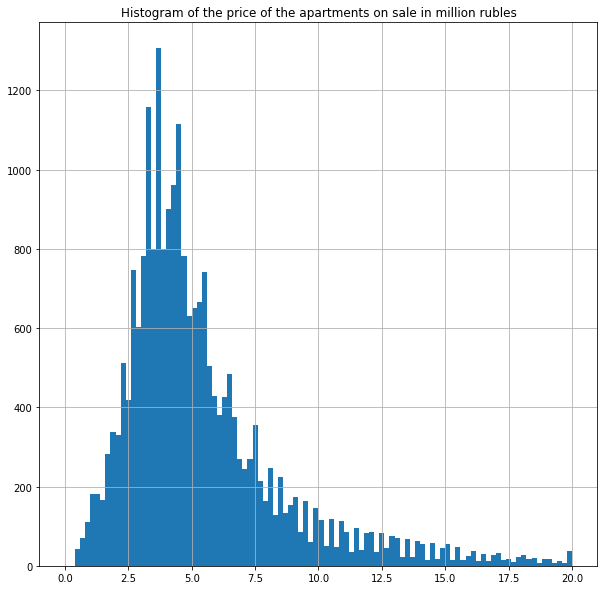

In [790]:
df['last_price_in_mln'].hist(bins=100, range=(0,20), figsize=(10,10), grid=True)
plt.title('Histogram of the price of the apartments on sale in million rubles')
plt.show()

Cannot see data clearly, so we narrow the number of bins down

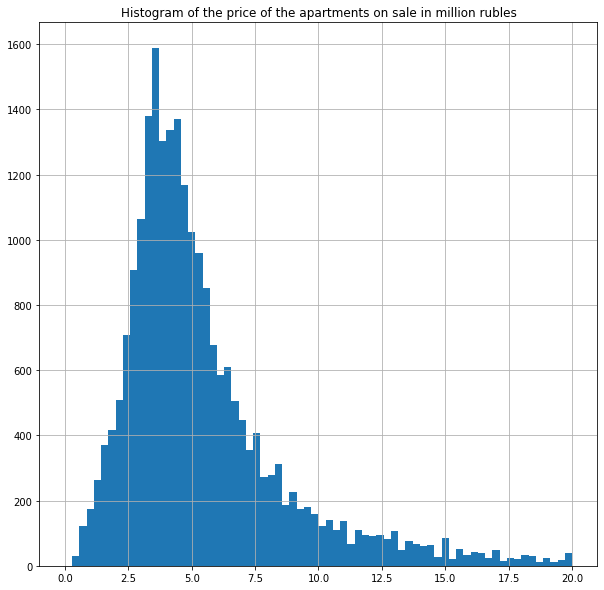

In [791]:
df['last_price_in_mln'].hist(bins=70, range=(0,20), figsize=(10,10), grid=True)
plt.title('Histogram of the price of the apartments on sale in million rubles')
plt.show()

This histogram shows that most of the residential premises offered for sale have prices from 2 to 20 million rubles. Frequency of other values is significantly lower.

**Plotting a histogram for 'total_area' column**

Text(0.5, 1.0, 'Histogram of the areas of the apartments on sale')

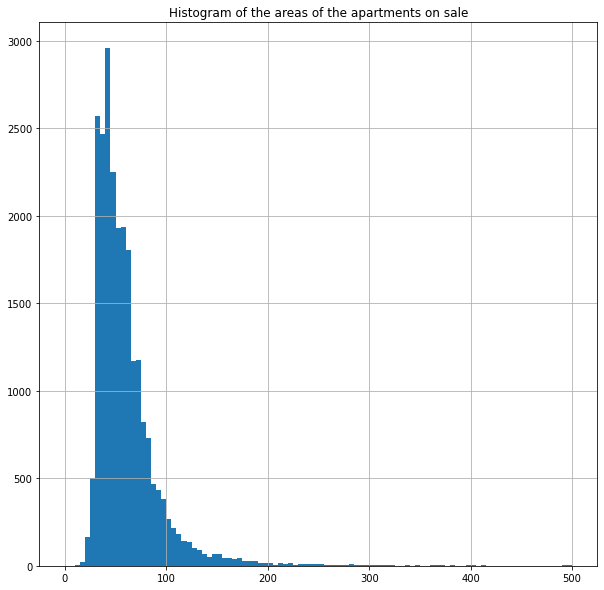

In [792]:
# plotting a histogram
df['total_area'].hist(bins=100, range=(0,500), figsize=(10,10), grid=True)
plt.title('Histogram of the areas of the apartments on sale')

This histogram shows that most of the housings set for sale have an area of 0 to 200 square meters. m. We can narrow down the number bins and teh range further to see the data clearer:

Text(0.5, 1.0, 'Histogram of the areas of the apartments on sale')

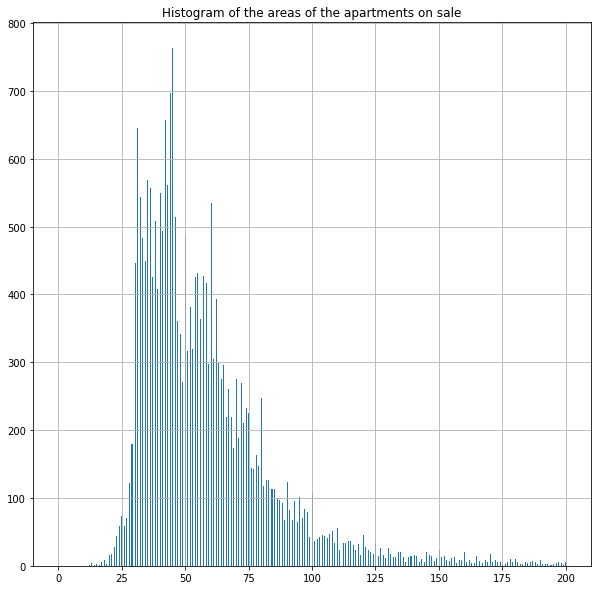

In [793]:
# plotting a histogram
df['total_area'].hist(bins=500, range=(0,200), figsize=(10,10), grid=True)
plt.title('Histogram of the areas of the apartments on sale')

A lot of values are in the range of 30 to 150. Frequency of other values is much lower.

**Plotting a histogram for 'rooms' column**

Text(0.5, 1.0, 'Histogram of the number of rooms in the apartments on sale')

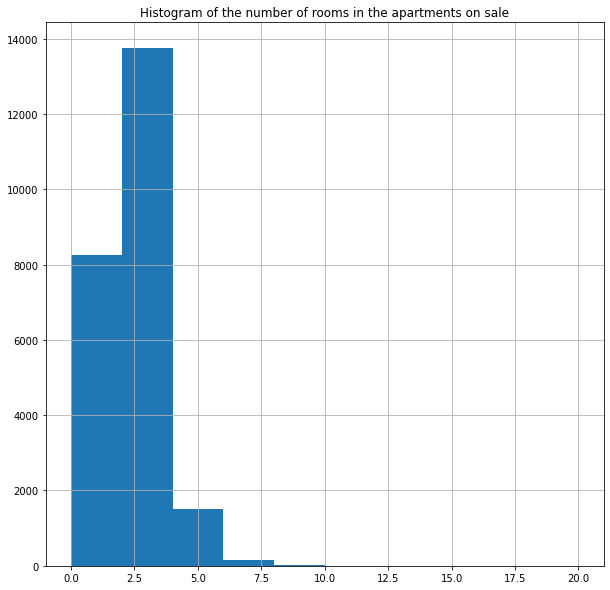

In [794]:
df['rooms'].hist(bins=10, range=(0,20), figsize=(10,10), grid=True)
plt.title('Histogram of the number of rooms in the apartments on sale')

This histogram shows that most apartments in the dataset have from 0 to 5 rooms.

**Plotting a histogram for 'ceiling_height' column**

Text(0.5, 1.0, 'Histogram of the number of rooms in the apartments on sale')

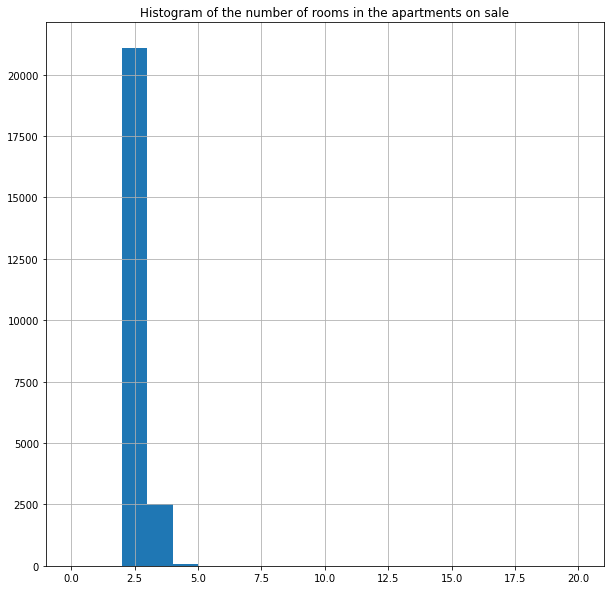

In [795]:
df['ceiling_height'].hist(bins=20, range=(0,20), figsize=(10,10), grid=True)
plt.title('Histogram of the number of rooms in the apartments on sale')

Cannot see data clearly enough. Narrow it down:

Text(0.5, 1.0, 'Histogram of the number of rooms in the apartments on sale')

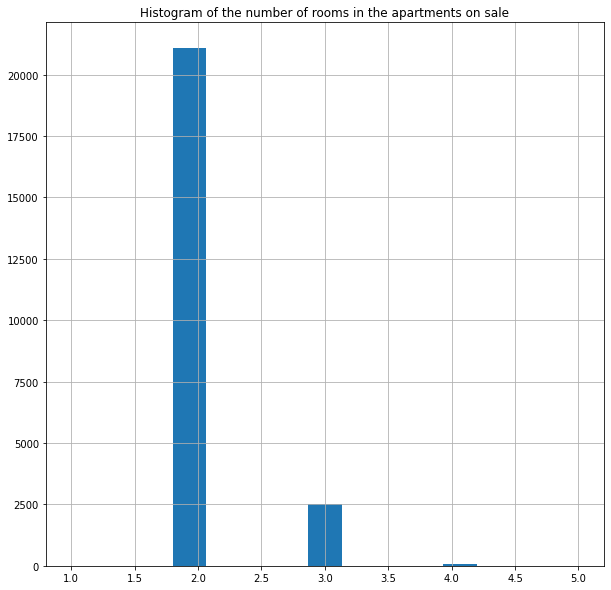

In [796]:
df['ceiling_height'].hist(bins=15, range=(1,5), figsize=(10,10), grid=True)
plt.title('Histogram of the number of rooms in the apartments on sale')

This histogram shows that most of the apartments have a ceiling height of 2 to 4 meters.

**Summary:** After evaluating the histograms, we set most popular ranges:

'last_price' is in the range of 1 to 20 million rubles.<br>
'total_area' is in the range of 30 to 150 $m^2$.<br>
'rooms' is in the range of 1 to 4.<br>
'ceiling_height' is 2 m and 4 m.<br>

**Plotting a histogram for 'days_exposition' column**

Researching the average time that is required to sell the apartment. Examine "days_exposition":

In [797]:
df['days_exposition'].describe()

count    23698.000000
mean       368.699679
std        518.936557
min          1.000000
25%         45.000000
50%        124.000000
75%        390.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [798]:
mean = (df['days_exposition'].mean()).round(2)
median = (df['days_exposition'].median()).round(2)
print()
print("Mean for number of days to sell the apartment is {} days".format(mean))
print("Median for number of days to sell the apartment is {} days".format(median))
print()


Mean for number of days to sell the apartment is 368.7 days
Median for number of days to sell the apartment is 124.0 days



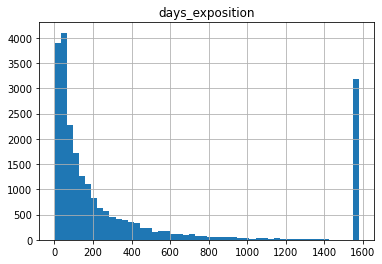

In [799]:
# plot a histogram for 'days_exposition'
df.hist(column='days_exposition', bins=50, range=(1, 1580)) 
plt.show()

Cannot see the data clearly. Let's narrow it down

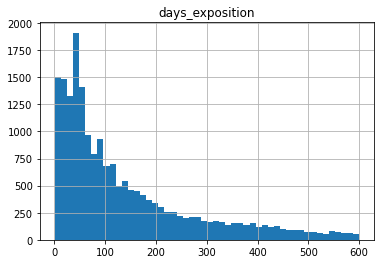

In [800]:
df.hist(column='days_exposition', bins=50, range=(1, 600))
plt.show()

Lets reduce the range a bit more:

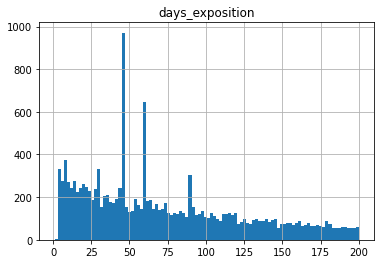

In [801]:
df.hist(column='days_exposition', bins=100, range=(1, 200)) 
plt.show()

We have 2 clear outliers between 40 and 60 days. These are days when ads get automatically closed if not updated.
'days_exposition_mean' > 'days_exposition_median', because we have outliers like max value = 1580 and between 40 and 60 days. The median is resistant to outliers. So the average time it usually takes to complete a sale is 95 days. 

Let's create a boxplot to see the outliers more clearly:

(-50.0, 600.0)

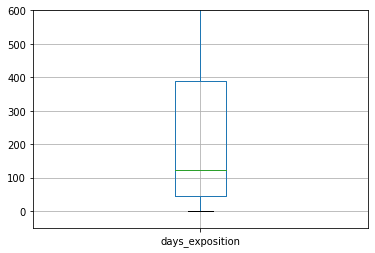

In [802]:
# plot boxpot for 'days_exposition'
df.boxplot(column='days_exposition') 
plt.ylim(-50, 600)

**Summary:**
We've confirmed that the sales for these apartments on average happened rather quickly (in less than 45 days), while other sales have taken an much longer time - more than 232 days. Both of these values seem quite realistic.

**Removing rare and outlying values and describing the patterns**

We have established that our dataset contains values which we can remove and create slices with the clean data

In [803]:
# draw boxlplot for aditional checking of the data outliers

KeyError: "None of [Index(['last_price_mil'], dtype='object')] are in the [columns]"

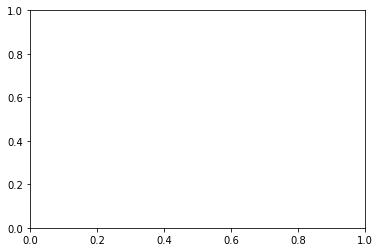

In [804]:
for col in ('last_price_in_mil', 'total_area', 'rooms', 'ceiling_height'):
    df.boxplot(column=col, showfliers=False, vert=False) # plot boxpot
    plt.show()

Based on the boxplots above we can choose the best parameters with the .query() method:

In [ ]:
df_new = (
    df.query('1 <= last_price_mil <= 12 and 30 <= total_area <= 150 and 1 <= rooms <= 6 and 2.2 <= ceiling_height <= 4')
)

**Summary:** The best parameters for the following columns are:
'last_price' is in the range of 1 to 12 million rubles.<br>
'total_area' is in the range of 20 to 150 $m^2$.<br>
'rooms' is in the range of 1 to 5.<br>
'ceiling_height' is 2.2 m and 4 m.<br>

**Finding factors that have the biggest influence on an apartment’s price**

First, look at the correlation between relevant variables:

In [ ]:
price_RoomAreaCenter = df[['price_sq_m','total_area', 'rooms','cityCenters_nearest']]

#finding correlation
display(price_RoomAreaCenter.corr())

,price_sq_m,total_area,rooms,cityCenters_nearest
price_sq_m,1.000000,0.298829,0.051371,-0.252517
total_area,0.298829,1.000000,0.757457,-0.210650
rooms,0.051371,0.757457,1.000000,-0.160764
cityCenters_nearest,-0.252517,-0.210650,-0.160764,1.000000


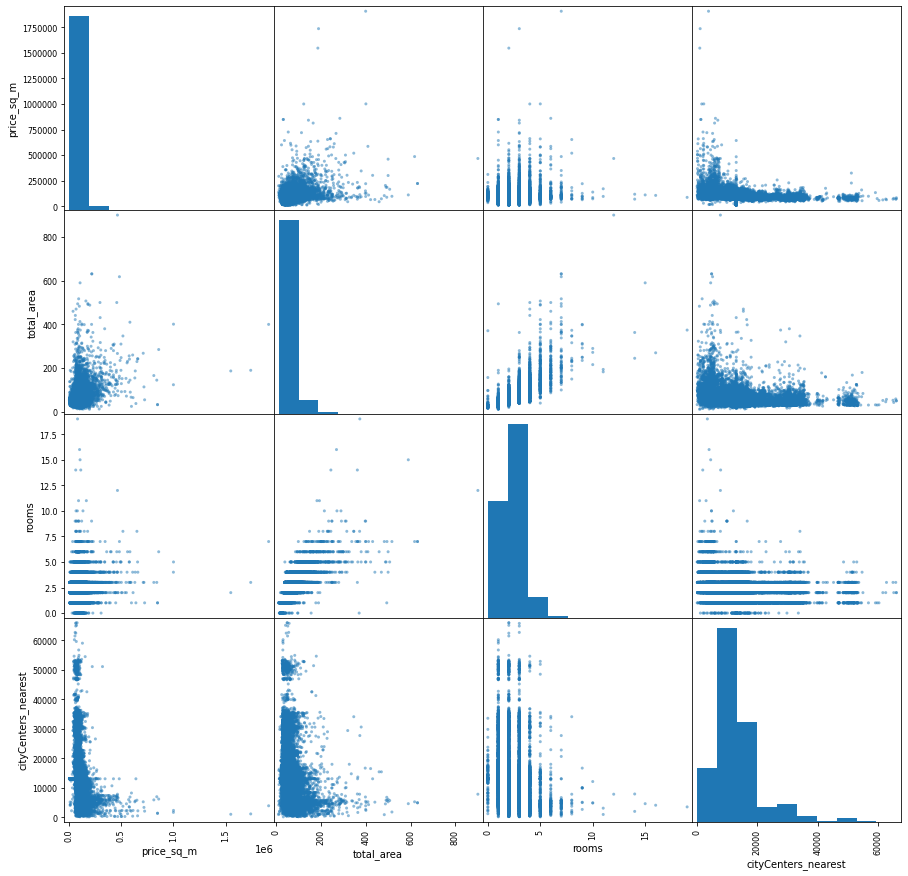

In [ ]:
#plotting the scatter matrix for the aforementioned variables
pd.plotting.scatter_matrix(price_RoomAreaCenter, figsize=(15, 15)) 
plt.show()

**Summary:** In this scatterplot matrix we're interested in the leftmost column:
 
1) The dependence of the price on the area of ​​​​the apartments and the number of rooms: the price to the ratio of the area and the number of rooms is unevenly distributed. Most often, such a scatter of data means insufficient or strong heterogeneity of data in the table (possibly - errors in the data). However, you can see from the histograms that the smaller the area and the smaller the number of rooms, the lower the price - regardless of the regions.

2) Гистограмма зависимости цены от удаленности помещения от центра показывает, что цена может быть относительно низкой и при довльно большом расстоянии от центра. Однако в данном случае мы исследуем все регионы вместе, что очень сильно может исказить реальную картину статистики. Ниже мы рассмотрим ту же зависимость по конкретному местоположению  - Санкт-Петербургу.

3) Из таблицы корреляции переменных видно (опять же, нам наиболее интересен крайний левый стобец), что цена, кол-во комнат, площидт имеют позитивную, но слабую корреляцию. Позитивная корреляция означает, что если один из параметров увеличится - второй тоже увеличится (но не сильно). То же самое относится и к высоте потолков, но в данном случае - означает, что если один из параметров станет меньше, то второй, наоборот, вырастет (например, возможно большинство покупателей предпочитают более низкие потолки и готовы заплатить чуточку больше за квартиру с такими потолками. Однако так как сильной корреляции нет, то напрашывается вывод, что есть какие-то другие, неизвестные нам факторы, которые влияют на цену.

In [ ]:
#зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом.
price_from_floor = df.pivot_table(index='floors_type', values='price_sq_m', aggfunc=['count','mean','median'])
price_from_floor.columns = ['count', 'mean_price', 'median_price']
display(price_from_floor)

,count,mean_price,median_price
floors_type,,,
другой,17441,103961.716530,98705
первый,2917,82361.068906,81578
последний,3340,93851.319162,88461


**Вывод 4.5** : Несмотря на то, что самая высокая средняя цена относится к типу этажей "другой", следует учитывать, что разница в количестве НЕ первых и НЕ последних этажей отличается в примерно 6 раз, а разница в среднем арифметическом - не так велика. Из этого можно сделать вывод, что самые дорогие квартиры (в среднем) - квартиры на последнем этаже, затем - квартиры на первом этаже, и наконец квартиры на остальных этажах по более умеренной цене.

array([[<AxesSubplot:xlabel='price_sq_m', ylabel='price_sq_m'>,
        <AxesSubplot:xlabel='publication_day', ylabel='price_sq_m'>,
        <AxesSubplot:xlabel='publication_month', ylabel='price_sq_m'>,
        <AxesSubplot:xlabel='publication_year', ylabel='price_sq_m'>],
       [<AxesSubplot:xlabel='price_sq_m', ylabel='publication_day'>,
        <AxesSubplot:xlabel='publication_day', ylabel='publication_day'>,
        <AxesSubplot:xlabel='publication_month', ylabel='publication_day'>,
        <AxesSubplot:xlabel='publication_year', ylabel='publication_day'>],
       [<AxesSubplot:xlabel='price_sq_m', ylabel='publication_month'>,
        <AxesSubplot:xlabel='publication_day', ylabel='publication_month'>,
        <AxesSubplot:xlabel='publication_month', ylabel='publication_month'>,
        <AxesSubplot:xlabel='publication_year', ylabel='publication_month'>],
       [<AxesSubplot:xlabel='price_sq_m', ylabel='publication_year'>,
        <AxesSubplot:xlabel='publication_day', ylabel='pu

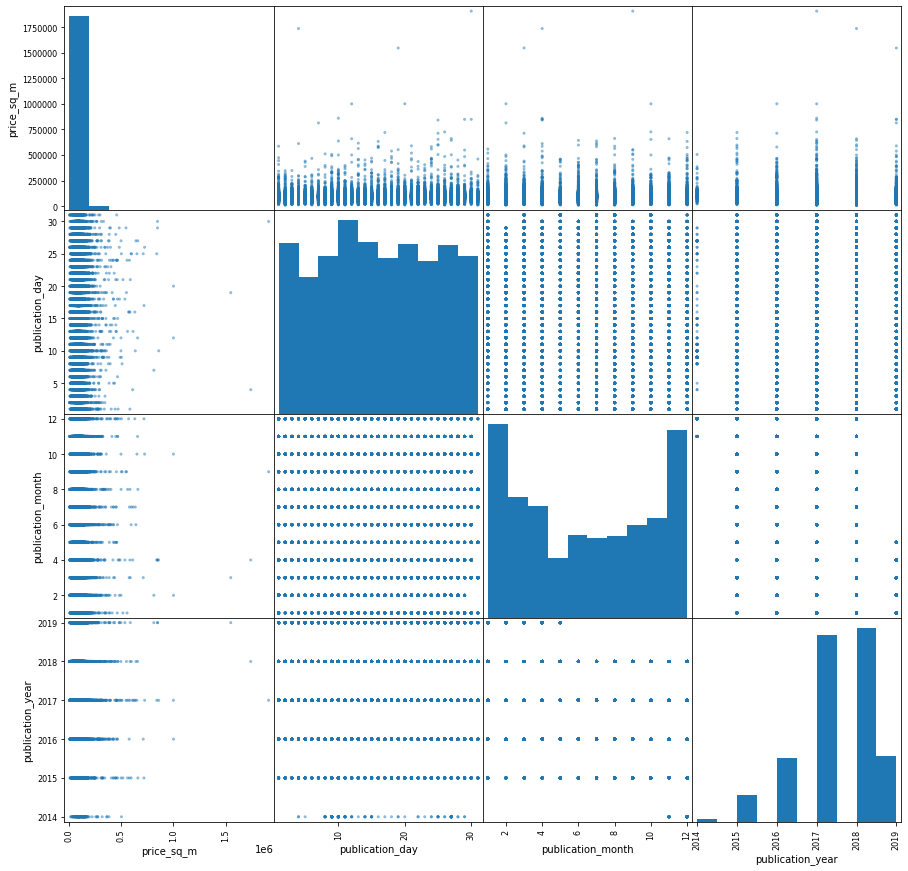

In [ ]:
#Также изучите зависимость от даты размещения: дня недели, месяца и года.
price_from_date = df[['price_sq_m','publication_day', 'publication_month','publication_year']]
pd.plotting.scatter_matrix(price_from_date, figsize=(15, 15)) 

**Вывод 4.6** : Подобно шагу 4.3, рассмотрим отношение цены к дням, месяцам и годам.
1. Из гистограммы видно, что цены повысились, начиная с 2014 года. Самая высокая цена была зафиксирована в 2017 году, и общий разброс цен в этом году расположен на значениях относительно выше остальных. Возможно, этот скачок обусловлен кризисом в 2015-16 годах, но могут быть и другие причины.
2. Что касается дня и месяца, здесь разбросы сконцентрированы чуть более равномерно, чем в "year", что означает, что цена не сильно зависит от времени года и числа месяца

In [ ]:
# населённые пункты самой высокой и низкой стоимостью жилья
locations_price = df.pivot_table(index='locality_name', values='price_sq_m', aggfunc='max')
highest_prices_loc = locations_price['price_sq_m'].nlargest(10)
print(highest_prices_loc)

KeyError: 'lemmatized_locality'

**Вывод 4.7** : Благодаря столбцу с лемматизированными локациями, были явлены 10 населенных пунктов с самыми дорогими жилыми помещениями. На первом месте- Санкт-Петербург, цена на кв. метр в котором отличается от минимального значения в этом списке (Кудрово) более чем в 11 раз.

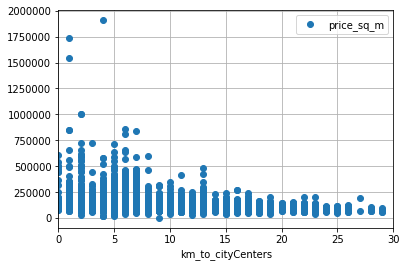

In [ ]:
#kак цена зависит от удалённости от центра
df['km_to_cityCenters'] = (df['cityCenters_nearest'] / 1000).round(0) #конвертация растояния до центра города из метров в километры
spb_slice = df.query('locality_name == "Санкт-Петербург"')

spb_slice.plot(x='km_to_cityCenters', y='price_sq_m', style='o', xlim=(0, 30), grid=True) 

**Вывод 4.8** : На этом графике, который фокусируется на срезе по городу Санкт-Петербург (с самыми дорогими жилыми помезениями), четко видно, что чем ближе жилое помещение к центру (ближе к 0), тем выше цены на жилье.

         price_sq_m
count  2.369900e+04
mean   9.987371e+04
std    5.041842e+04
min    1.110000e+02
25%    7.698500e+04
50%    9.545400e+04
75%    1.148640e+05
max    1.907500e+06

            price_sq_m
price_sq_m         1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f675e8c5a50>,
      dtype=object)

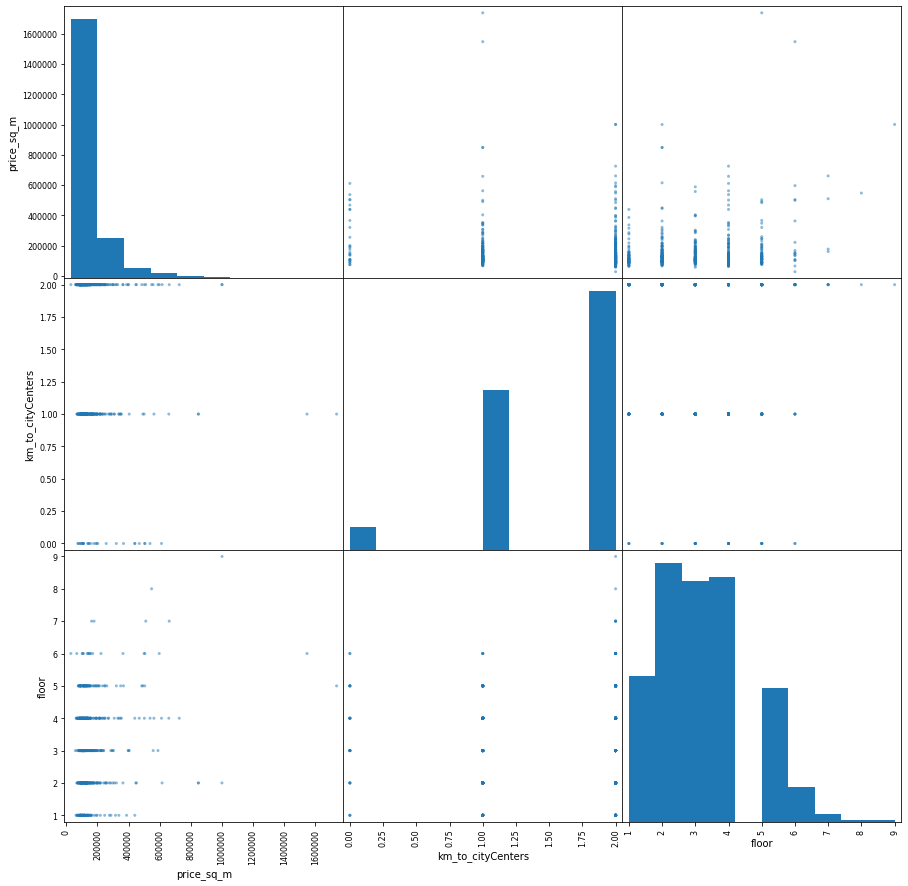

In [ ]:
#Анализ квартир в центре города (Санкт-петербург)
spb_cityCenter = spb_slice.query('km_to_cityCenters <= 2')
print(df[['price_sq_m','total_area', 'rooms','ceiling_height']].describe())
print()
print(df[['price_sq_m','total_area', 'rooms','ceiling_height']].corr())

housing_center = spb_cityCenter[['price_sq_m','rooms','km_to_cityCenters','floor','first_day_exposition']]

pd.plotting.scatter_matrix(housing_center, figsize=(15, 15))

<font color='blue'>***UPDATED:***</font> 

Из таблицы корреляции переменных выше видно, что самая сильная корреляция - корреляция между кол-вом комнат и площадью квартиры (логичный вывод). Корреляция по всем остальным переменным позитивная, но слабая, что означает, что если один из параметров увеличится, другой тоже увеличится, но не сильно. Как и при прошлой таблици корреляции, это значает, что возможно есть какие-то другие, более значимые факторы, которые у нас отсутствуют.

**Вывод 4.9** : Аналогично с шагом 4.3 проанализируем отношение цены к этажу, растоянию от центра и кол-ву комнат, но в этот раз сфокусируемся на Санкт-Петербурге. 
1) Отношение цены к этажу: Наибольшее количество выставленных на продажу квартира находятся на 1-5 этажах. Однако, вопреки предыдущему анализу в шаге 4.5, самая высокая цена зафиксирована у 5 этажа. Является ли 5й этаж последним в этом дома - неизвестно.

2) В данном анализе я предположила, что центром можно считать все квартиры расположенные на растоянии 0-2 км от условного "центра города". Как видно на гистограмме, непосредственно в центре Петеррбурга довольно мало объявлений. А самая высокая цена зафиксирована у помещений на расстоянии примерно 1 км от центра.

3) Аналогично, по гистограмме видно, что самая большая цена зафиксирована у помещения с 3 комнатами. А также, наибольшее кол-во выставленных на продажу жилых площадей имеют 2-5 комнат.

## Общий вывод

Разобъём итоги на несколько этапов:
Шаг 1: Проведена первичная оценка имеющихся данных, выявлены пропуски, ошибки, намечен план дальнейших действий по предобработке данных
Шаг 2: Обработан каждый из 22х столбцов в таблице, пропуски заполнены соответствующими значениями, логика заполнения пропусков зафиксирована (в выводе под заданием). По окончании предобработки данных, все пропуски заполнены, столбец 'locality_area' был лемматизирован и преобразован в новый столбец для удобства поиска по данным и с целью исправить имеющиеся ошибки, возникшие при вводе/хранении данных
Шаг 3: Проведены необходимые расчеты и созданы соответствующие столбцы в общем датафрейме. Дополнительно был создан столбец 'last_price_in_mln', который отражал цену помещения в миллионах вместо единиц рублей.
Шаг 4. Проведен исследовательский анализ данных, построены многочисленные графики, гистограммы и сводные таблицы, с целью исследовать данные с каждой стороны

**ИТОГ:** Изначально поставленной задачей было установить параметры, которые бы помогли определять рыночную стоимость объектов недвижимости, чтобы она отслеживать аномалии и мошенническую деятельность. После тщательного анализа данных было выявлено, что самые дорогие квартиры находятся в Санкт-петербурге, в центре города, с кол-вом комнат 2-5, на первых этажах дома, которые были выставлены на продажу не дольше 2х лет. Примерно тот же тренд поддерживается и для других населенных пунктов.

Среди аномалий было выявлено следующее: 

1) Большое количество пропусков в данных, которые описывают качества жилого помещения (растояние от центра, кол-во комнат, площадь помещения, этаж итд) и неравномерное их распределение (много выбросов)

2) Были обнаружены жилые помещения, которые были выставлены на продажу более 3х лет. Также есть немалое количество квартир, которые продавались за срок меньше недели. Причина - неизвестна.

**Рекоммендации:**
1) Выяснить причину наличия пропусков и: а) заполнить их самостоятельно; б) потребовать самих продавцов заполнить отсутсвтующие данные, особенно связанные с описанием самого продаваемого объекта
2) Удалять из базы данных все объявления, которые не закрываются более 2х лет.
3) Выяснить причину "слишком быстрого" закрытия сделки на квартиры, если это возможно, и внести это в базу данных

<div class="alert alert-success">
<b>Комментарий ревьюера (2):</b>

Выводы понятны и логичны, а самое главное подкреплены выявленными фактами.
       
В целом сам проект выполнен на хорошем уровне! На протяжении всей работы чувствуется глубина проработки задачи и это безусловный плюс для нас. Было использовано большое количество методов, которые будут помогать тебе в дальнейших проектах.
    
    
Поздравляю с успешным завершением проекта 😊👍
    
И желаю успехов в новых работах 😊
    
**[общий комментарий]** Ячейки **markdown** в том числе мы можем использовать как дополнительный способ стилизации нашего проекта. Оставил ниже ссылку, с примерами стилизации.

https://sqlbak.com/blog/jupyter-notebook-markdown-cheatsheet
    
</div>

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод